**10.34. All of a company's job applicants must take a test. The selection ratio is the cutoff point used by the company in its hiring process. For example, a selection ratio of 25% means that the company will accept applicants for jobs who rank in the top 25% of all applicants.**

**Suppose the company uses a selection ratio of 5%, i.e., accepts only applicants who score at or above the 95th percentile on the test.**

**This problem asks you to use simulation to identify the average test score among selected applicants for two possible probability distributions. Run your simulations with 1000000 iterations. For this problem generate a single sample of 1000000 scores for each probability distribution. Then compute the average score from the scores that are at or above the 95th percentile.**

**Write your numerical answers with no decimal or commas to the nearest integer (e.g., if your computed answer is 101,021.128, write your answer as 101021).**

**Hints for part b: For this question, you may wish to use the NumPy function numpy.random.lognormal() to generate your sample. However, this function requires the parameters of the normal random variable that underlies the lognormal.**

**Here is the relationship between the mean mu_Y and variance sigma_Y^2 of a lognomal (e.g., in this problem mu_Y = 100 and sigma_Y^2 = 400) and the corresponding mean and variance of the underlying normal random variable denoted mu_X and variance sigma_X^2:**

• sigma_X^2 = ln(sigma_Y^2/mu_Y^2 + 1) = ln(400/100^2 + 1) (approx. 0.039, but use the formula result for necessary precision)

• mu_X = ln(mu_Y) - 0.5sigma_X^2 = ln(100) - 0.5sigma_X^2 (approx. 4.59, but use the formula result for necessary precision)

• Note that the arguments of numpy.random.lognormal() are mean and standard deviation, i.e., mu_X and sigma_X

**a. Suppose test scores follow a normal distribution. The average test score is 100 and the standard deviation is 20. The average test score of accepted applicants is**

Mean of all test scores: 100.00
Standard deviation of all test scores: 20.01
95th percentile cutoff score: 132.86
The average test score of accepted applicants is: 141.23


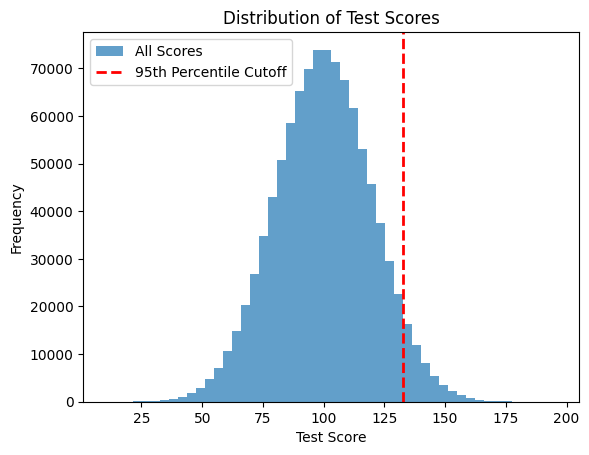

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the normal distribution
mean_score = 100
std_dev = 20
num_samples = 1_000_000

# Generate test scores from a normal distribution
scores = np.random.normal(loc=mean_score, scale=std_dev, size=num_samples)

# Compute the 95th percentile cutoff
percentile_95 = np.percentile(scores, 95)

# Select applicants who scored at or above the 95th percentile
selected_scores = scores[scores >= percentile_95]

# Compute the average score of accepted applicants
average_selected_score = np.mean(selected_scores)

# Display statistics
print(f"Mean of all test scores: {np.mean(scores):.2f}")
print(f"Standard deviation of all test scores: {np.std(scores):.2f}")
print(f"95th percentile cutoff score: {percentile_95:.2f}")
print(f"The average test score of accepted applicants is: {average_selected_score:.2f}")

# Plot histogram
plt.hist(scores, bins=50, alpha=0.7, label='All Scores')
plt.axvline(percentile_95, color='r', linestyle='dashed', linewidth=2, label='95th Percentile Cutoff')
plt.xlabel('Test Score')
plt.ylabel('Frequency')
plt.title('Distribution of Test Scores')
plt.legend()
plt.show()

**b. Suppose test scores follow a lognormal distribution with the same mean (100) and standard deviation (20, i.e., variance = 400). The average test score of accepted applicants is**

Mean of all test scores: 99.99
Standard deviation of all test scores: 19.98
95th percentile cutoff score: 135.79
The average test score of accepted applicants is: 147.85


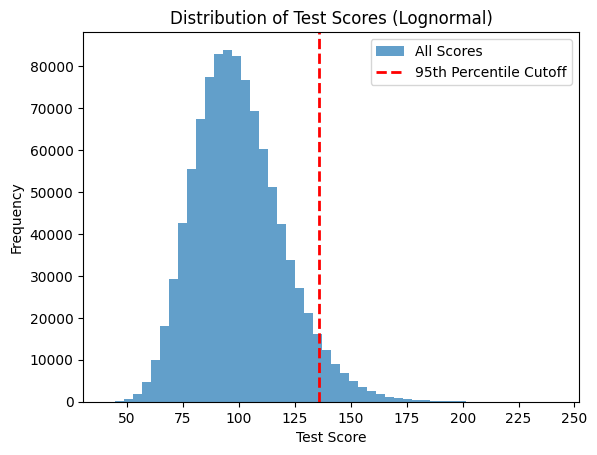

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the lognormal distribution
mean_Y = 100
variance_Y = 400
num_samples = 1_000_000

# Compute parameters for the underlying normal distribution
sigma_X2 = np.log(variance_Y / mean_Y**2 + 1)
sigma_X = np.sqrt(sigma_X2)
mu_X = np.log(mean_Y) - 0.5 * sigma_X2

# Generate test scores from a lognormal distribution
scores = np.random.lognormal(mean=mu_X, sigma=sigma_X, size=num_samples)

# Compute the 95th percentile cutoff
percentile_95 = np.percentile(scores, 95)

# Select applicants who scored at or above the 95th percentile
selected_scores = scores[scores >= percentile_95]

# Compute the average score of accepted applicants
average_selected_score = round(np.mean(selected_scores), 2)

# Display statistics
print(f"Mean of all test scores: {round(np.mean(scores), 2)}")
print(f"Standard deviation of all test scores: {round(np.std(scores), 2)}")
print(f"95th percentile cutoff score: {round(percentile_95, 2)}")
print(f"The average test score of accepted applicants is: {average_selected_score}")

# Plot histogram
plt.hist(scores, bins=50, alpha=0.7, label='All Scores')
plt.axvline(percentile_95, color='r', linestyle='dashed', linewidth=2, label='95th Percentile Cutoff')
plt.xlabel('Test Score')
plt.ylabel('Frequency')
plt.title('Distribution of Test Scores (Lognormal)')
plt.legend()
plt.show()